In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"D:\100 Days machine learning\Missing Indicator_Random Sample Imputation day 38\train.csv",usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X=df.drop(columns=['Survived'])

In [8]:
y=df['Survived']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [11]:
X_train.shape,X_test.shape


((712, 2), (179, 2))

In [12]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [13]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [14]:
X_train

,Age,Fare,Age_imputed
146,27.0,7.7958,27.0
195,58.0,146.5208,58.0
786,18.0,7.4958,18.0
290,26.0,78.8500,26.0
521,22.0,7.8958,22.0
...,...,...,...
256,NaN,79.2000,NaN
643,NaN,56.4958,NaN
249,54.0,26.0000,54.0
664,20.0,7.9250,20.0


In [17]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

In [18]:
X_train

,Age,Fare,Age_imputed
146,27.0,7.7958,27.0
195,58.0,146.5208,58.0
786,18.0,7.4958,18.0
290,26.0,78.8500,26.0
521,22.0,7.8958,22.0
...,...,...,...
256,NaN,79.2000,42.0
643,NaN,56.4958,24.0
249,54.0,26.0000,54.0
664,20.0,7.9250,20.0


In [19]:
import seaborn as sns

C:\Users\avani\AppData\Local\Temp\ipykernel_12584\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\avani\AppData\Local\Temp\ipykernel_12584\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[

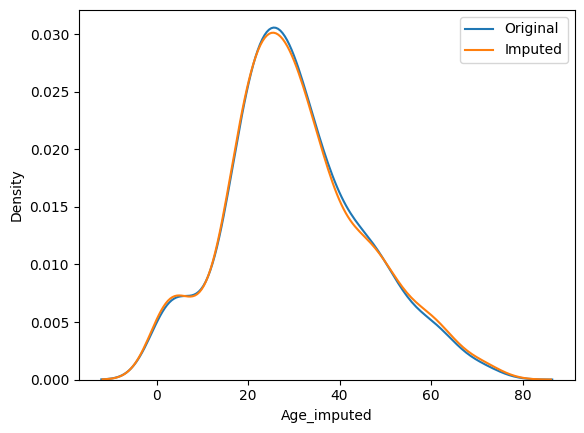

In [27]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [28]:
X_train['Age'].var()

np.float64(219.41287982680032)

In [29]:
X_train['Age_imputed'].var()

np.float64(229.58004583432103)

In [34]:
X_train[['Age','Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,219.412880,89.088659,219.412880
Fare,89.088659,2514.388654,68.636902
Age_imputed,219.412880,68.636902,229.580046


<Axes: >

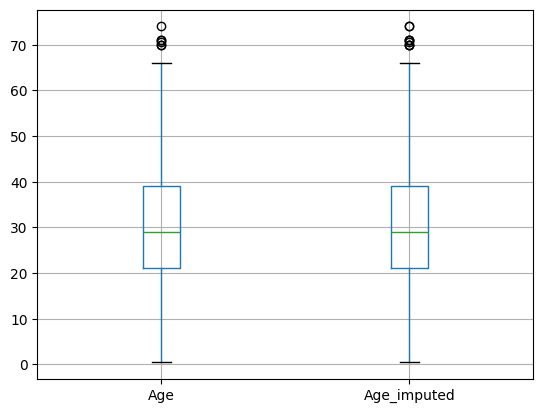

In [36]:
X_train[['Age','Age_imputed']].boxplot()

### sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


In [43]:
data=pd.read_csv(r"D:\100 Days machine learning\Missing Indicator_Random Sample Imputation day 38\house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [44]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [45]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [46]:
X=data.drop(columns=['SalePrice'])

In [47]:
y=data['SalePrice']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
X_train.shape,X_test.shape

((1168, 2), (292, 2))

In [52]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [53]:
X_train

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,TA,TA
863,NaN,TA,TA,NaN
504,Fa,TA,TA,Fa
1413,Gd,TA,TA,Gd
1389,Gd,TA,TA,Gd
...,...,...,...,...
466,Po,TA,TA,Po
299,Gd,TA,TA,Gd
493,Fa,TA,TA,Fa
527,Gd,TA,TA,Gd


In [55]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

C:\Users\avani\AppData\Local\Temp\ipykernel_12584\1008884665.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [58]:
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\avani\AppData\Local\Temp\ipykernel_12584\2168481543.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].is

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
606,NaN,TA,TA,NaN
61,NaN,TA,TA,NaN
307,NaN,NaN,Ex,NaN
239,Gd,TA,TA,Gd
481,Gd,TA,TA,Gd
1286,Gd,TA,TA,Gd
922,Gd,TA,TA,Gd
405,TA,TA,TA,TA
1308,NaN,TA,TA,NaN
819,Gd,TA,TA,Gd


In [64]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\avani\AppData\Local\Temp\ipykernel_12584\2197018253.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['Fireplac

In [65]:
X_test

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
503,TA,TA,TA,TA
101,TA,TA,TA,TA
608,Gd,TA,TA,Gd
1089,Gd,TA,TA,Gd
819,Gd,TA,TA,Gd
...,...,...,...,...
816,Gd,TA,TA,Gd
1273,Gd,TA,TA,Gd
285,NaN,TA,TA,TA
194,NaN,TA,TA,TA


In [66]:
temp= pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train['GarageQual_imputed'])
    
],axis=1)

In [67]:
temp.columns=['Orignal','imputed']

In [68]:
temp

,Orignal,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [69]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.643098
TA,0.412439,0.545455
Fa,0.040917,0.051627
Po,0.027823,0.037037
Ex,0.024550,0.033670
